In [1]:
import os
import glob

import numpy as np

In [26]:
p = '19'
run = ['01','02','03','04']

In [27]:
full_list = os.listdir(os.path.join('..','data','music-char-data'))


# list to store files
csv_file = []


for r in run:
    
    # identify csv file for each run
    tok_filename = f'{p}_{r}'
    
    # Iterate directory
    for file in full_list:
        # check only text files
        if file.startswith(tok_filename) and file.endswith('.csv'):
            csv_file.append(file)
        

In [28]:
csv_file

['19_01_musicemotionlatency_2023_Dec_06_1657.csv',
 '19_02_musicemotionlatency_2023_Dec_06_1702.csv',
 '19_03_musicemotionlatency_2023_Dec_06_1707.csv',
 '19_04_musicemotionlatency_2023_Dec_06_1712.csv']

In [29]:
def getQ(row):  
    t = row['music.id'].split('/')
    return (f'{t[3]}')

def categorise(row):  
    if row['mouse.x'] > 0 and row['mouse.y'] > 0:
        return 'Q1'
    elif row['mouse.x'] < 0 and row['mouse.y'] > 0:
        return 'Q2'
    elif row['mouse.x'] < 0  and row['mouse.y'] < 0:
        return 'Q3'
    return 'Q4'

In [30]:
import pandas as pd

y_true = []
y_pred= []

valence=[]
arousal=[]


for  file in csv_file:
    

    print(f'{file}')

    df_Q = pd.read_csv(os.path.join('..','data','music-char-data', file))
    
    # Last row NaN.
    df_Q = df_Q[:24]
    
    
    # Select rows of interest.
    df_Q=df_Q[['music.id','mouse.x','mouse.y']]
    
    # Extract position from mouse columns.
    df_Q['mouse.x'] = df_Q['mouse.x'].str[1:-1].astype(float)
    df_Q['mouse.y'] = df_Q['mouse.y'].str[1:-1].astype(float)
    
    # extract Q from music filename.
    df_Q['music.id_project'] = df_Q.apply(lambda row: getQ(row), axis=1)
    
    # Get Q from mouse click position.
    df_Q['Quadrants.participant'] = df_Q.apply(lambda row: categorise(row), axis=1)

    valence.append(df_Q['mouse.x'].values)
    arousal.append(df_Q['mouse.y'].values)
    
    y_true.append(df_Q['music.id_project'].values)
    y_pred.append( df_Q['Quadrants.participant'].values)
    
    # print(df_Q[['music.id', 'Quadrants.participant']])
    
    
    

19_01_musicemotionlatency_2023_Dec_06_1657.csv
19_02_musicemotionlatency_2023_Dec_06_1702.csv
19_03_musicemotionlatency_2023_Dec_06_1707.csv
19_04_musicemotionlatency_2023_Dec_06_1712.csv


In [31]:
y_true

[array(['Q3', 'Q2', 'Q4', 'Q2', 'Q2', 'Q4', 'Q3', 'Q2', 'Q4', 'Q1', 'Q3',
        'Q2', 'Q3', 'Q4', 'Q2', 'Q4', 'Q4', 'Q3', 'Q1', 'Q1', 'Q1', 'Q1',
        'Q3', 'Q1'], dtype=object),
 array(['Q2', 'Q2', 'Q1', 'Q3', 'Q2', 'Q4', 'Q1', 'Q1', 'Q4', 'Q2', 'Q1',
        'Q3', 'Q3', 'Q3', 'Q1', 'Q4', 'Q3', 'Q4', 'Q4', 'Q3', 'Q1', 'Q2',
        'Q2', 'Q4'], dtype=object),
 array(['Q3', 'Q4', 'Q3', 'Q4', 'Q1', 'Q2', 'Q2', 'Q4', 'Q1', 'Q2', 'Q2',
        'Q1', 'Q1', 'Q3', 'Q1', 'Q1', 'Q2', 'Q4', 'Q3', 'Q4', 'Q3', 'Q2',
        'Q4', 'Q3'], dtype=object),
 array(['Q2', 'Q3', 'Q4', 'Q2', 'Q1', 'Q3', 'Q3', 'Q1', 'Q3', 'Q4', 'Q4',
        'Q1', 'Q1', 'Q3', 'Q4', 'Q2', 'Q1', 'Q4', 'Q2', 'Q2', 'Q1', 'Q4',
        'Q3', 'Q2'], dtype=object)]

In [32]:
y_pred

[array(['Q2', 'Q2', 'Q4', 'Q1', 'Q2', 'Q4', 'Q4', 'Q2', 'Q4', 'Q1', 'Q1',
        'Q2', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
        'Q4', 'Q1'], dtype=object),
 array(['Q1', 'Q2', 'Q1', 'Q1', 'Q2', 'Q4', 'Q4', 'Q2', 'Q4', 'Q2', 'Q1',
        'Q4', 'Q4', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4', 'Q4', 'Q4', 'Q1', 'Q2',
        'Q2', 'Q3'], dtype=object),
 array(['Q4', 'Q1', 'Q4', 'Q3', 'Q1', 'Q1', 'Q2', 'Q4', 'Q1', 'Q2', 'Q2',
        'Q3', 'Q4', 'Q4', 'Q1', 'Q4', 'Q2', 'Q4', 'Q1', 'Q4', 'Q4', 'Q4',
        'Q4', 'Q4'], dtype=object),
 array(['Q2', 'Q4', 'Q4', 'Q3', 'Q1', 'Q4', 'Q4', 'Q3', 'Q4', 'Q4', 'Q4',
        'Q1', 'Q1', 'Q4', 'Q1', 'Q2', 'Q4', 'Q4', 'Q4', 'Q2', 'Q1', 'Q4',
        'Q4', 'Q3'], dtype=object)]

In [33]:
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

valence = np.concatenate(valence)
arousal = np.concatenate(arousal)

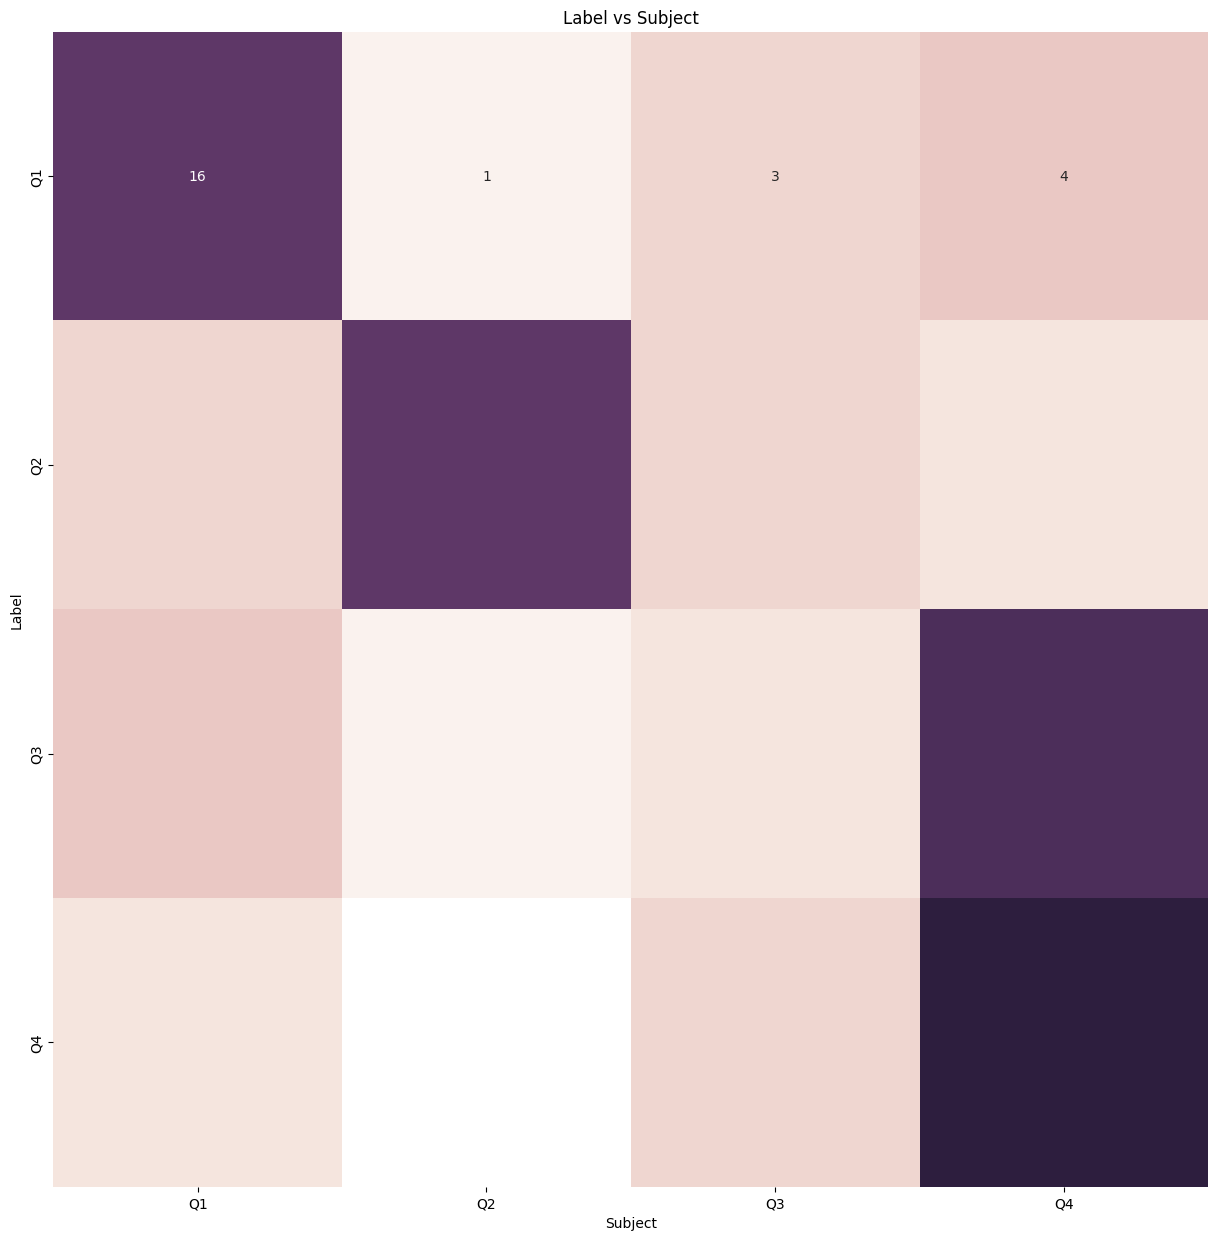

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
%matplotlib inline

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Label'
df_cm.columns.name = 'Subject'

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})
plt.title('Label vs Subject')
plt.show()

In [35]:
df_cm

Subject,Q1,Q2,Q3,Q4
Label,,,,
Q1,16,1,3,4
Q2,3,16,3,2
Q3,4,1,2,17
Q4,2,0,3,19


In [36]:
data.tofile(os.path.join('results',f'{p}_confusionmat.csv'),sep=",")


In [37]:
df_RusPos=pd.DataFrame({'valence': valence, 'arousal':arousal})


df_RusPos.to_csv(os.path.join('results',f"{p}_valence_arousal.csv"))


print(len(df_RusPos))

print(df_RusPos.head(10))




96
    valence   arousal
0 -0.146667  0.225714
1 -0.146667  0.225714
2  0.129524 -0.080000
3  0.152381  0.151429
4 -0.129524  0.167619
5  0.087619 -0.054286
6  0.150476 -0.131429
7 -0.203810  0.158095
8  0.127619 -0.115238
9  0.195238  0.305714


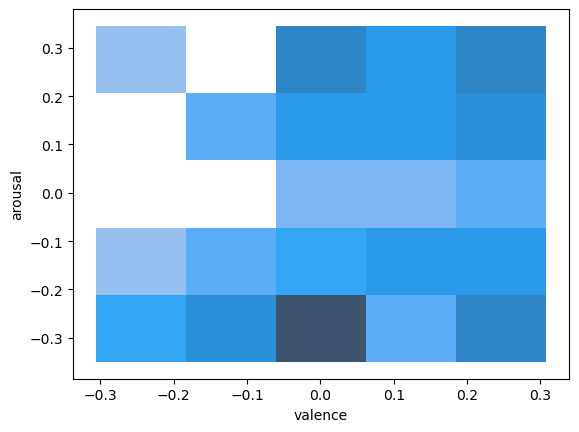

In [479]:


sns_histplot=sns.histplot(data=df_RusPos, bins=5, kde=True,  x="valence", y='arousal')

fig = sns_histplot.get_figure()
fig.savefig(os.path.join('results',f"{p}_RussCirc2DHist.png"))

In [38]:



# Append-adds at last
f_h = open(os.path.join("results","groupRussPos.csv"),"a")  # append mode
f_h.write(f"{np.max(valence)}, {np.max(arousal)},{np.min(valence)}, {np.min(arousal)} \n")
f_h.close()


## 